In [1]:
import numpy as np
import cv2
from matplotlib.pyplot import imshow
from keras.models import Sequential,model_from_json
from keras.layers import Dense,Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dropout
from keras.utils import to_categorical
import os
import time
from matplotlib import *
from pylab import *

Using TensorFlow backend.


In [2]:
def shadowsX(image_path):
    img = cv2.imread(image_path, -1)
    rgb_planes = cv2.split(img)
    result_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        result_planes.append(diff_img)
        
    result = cv2.merge(result_planes)
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (1, 1), 0)
    _,thresh = cv2.threshold(gray ,230,255,cv2.THRESH_BINARY_INV)
    dilate = cv2.dilate(thresh, None, iterations=1)
    return dilate

In [3]:
def segment(image):
    
    cnts,_ = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    i = 0
    stack=[]
    stack28=[]
    for cnt in cnts:
        if(cv2.contourArea(cnt) < 100):
            continue

        x,y,w,h = cv2.boundingRect(cnt)
        roi = image[y:y+h, x:x+w]
        roi=255-roi
        cv2.imwrite('roth' + str(i) + '.png', roi)
        roi = image[y:y+h, x:x+w]
        roi=cv2.resize(roi,(28,28))
        stack28.append(roi)
        roi=np.pad(roi,((2,2),(2,2)),'constant')
        stack.append(roi)
        i = i + 1 
    return stack,stack28

In [4]:
def load_model():
    json_file=open('model.json')
    loaded=json_file.read()
    model=model_from_json(loaded)
    json_file.close()
    model.load_weights('model9322.h5')
    return model

In [5]:
def crestening(stack):
    model=load_model()
    stack=np.array(stack)
    stack=stack.reshape((stack.shape[0],32,32,1))
    pred=model.predict(stack)
    for i in range(stack.shape[0]):
        img=cv2.imread('roth'+str(i)+'.png')
        imshow(img.astype('uint8'))
        show()
        pos=np.argmax(pred[i])
        c=input('predicted as: ' +chr(97+pos))
        if not c:
            os.remove('roth'+str(i)+'.png')
            continue
        else:
            os.rename('roth'+str(i)+'.png',c[0]+'th.png')
        clf()

In [6]:
#using original images
def generate(text,spa):
    gen=np.ones((2000,2000,3))*255
    x=100
    y=100
    space=np.ones((1,spa,3))*255
    dash=np.zeros((8,15,3))
    text=text.lower()
    for i in range(len(text)):
        c=text[i];
        if 2000-y<80 and 2000-y>20:
            if c!=' 'and text[i-1]!=' ' and c!='\n':
                gen[x-15:x-7,y+5:y+20,:]=dash
            x+=100
            y=100


        if c=='\n':
            x+=100
            y=100

        else:
            if c==' ':
                gen[x-1:x,y:y+spa,:]=space
                y+=spa
            else:
                img=cv2.imread(c+'th.png') 
                w=img.shape[0]
                h=img.shape[1]
                if c=='g' or c=='j'or c=='p'or c=='q'or c=='y':
                    upper=np.floor(w/2).astype(int)
                    lower=np.ceil(w/2).astype(int)
                    gen[x-upper:x+lower,y:y+h,:]=img

                else:
                    gen[x-w:x,y:y+h,:]=img

                y=y+h+5
    return gen

In [7]:
def delete():
    for i in range(97,97+26):
        c=chr(i)
        os.remove(c+'th.png')

(28, 32, 32)


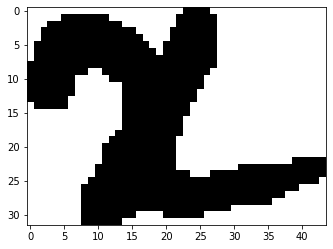

predicted as: zx


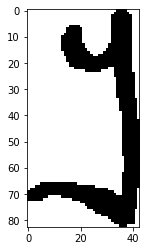

predicted as: iy


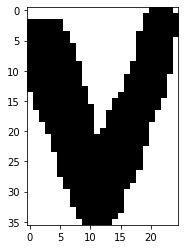

predicted as: wv


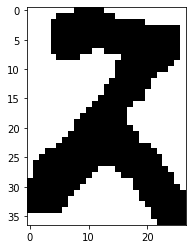

predicted as: zz


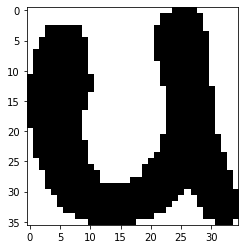

predicted as: uu


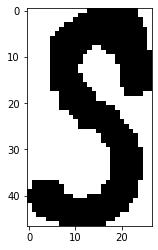

predicted as: ss


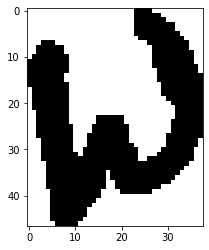

predicted as: ww


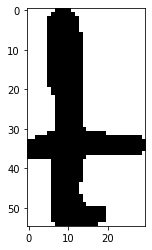

predicted as: gt


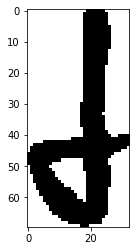

predicted as: dj


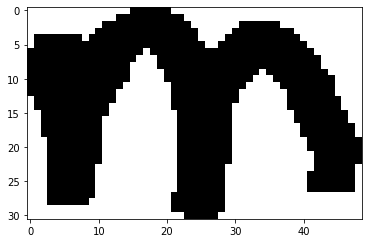

predicted as: wm


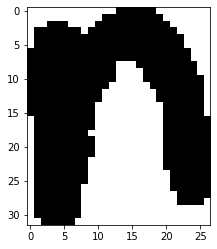

predicted as: nn


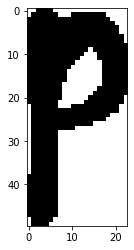

predicted as: pp


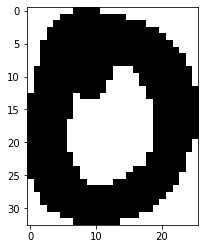

predicted as: co


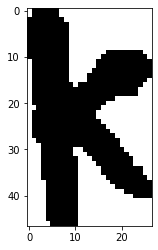

predicted as: kk


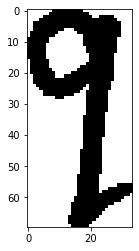

predicted as: gq


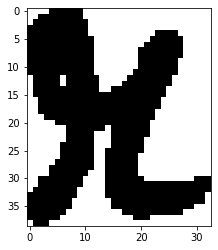

predicted as: nr


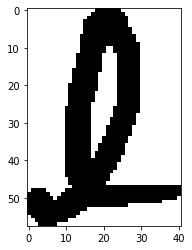

predicted as: dl


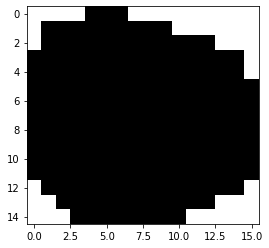

predicted as: b


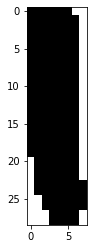

predicted as: gi


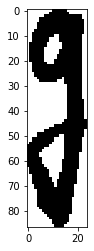

predicted as: ag


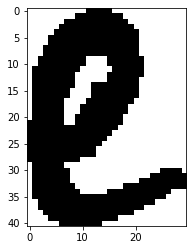

predicted as: ee


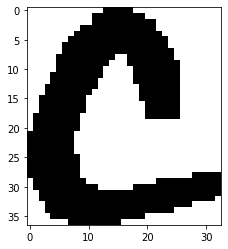

predicted as: cc


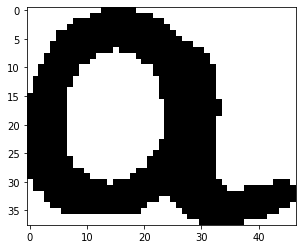

predicted as: za


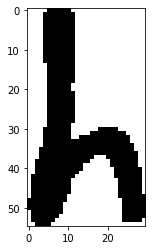

predicted as: bh


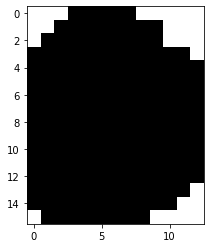

predicted as: b


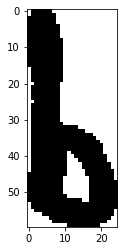

predicted as: bb


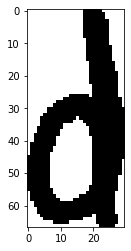

predicted as: dd


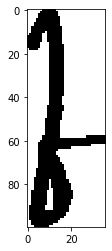

predicted as: lf


<Figure size 432x288 with 0 Axes>

In [9]:
op=shadowsX('man.jpeg')
stack,stack28=segment(op)
stack=np.array(stack)
print(stack.shape)
crestening(stack)

In [172]:
text='you are the shadow  to my life didi you feel us i am not the star you fade away a where are you now was it all in my fantasy where are you now  you only imaginary where are you now another dream the monster running wild inside of me i ma faded la la la la la i am not gonna make it alone'

In [13]:
text='Title   avl tree\n\nProblem statement     a dictionary sores keywords and its meaning provide facility for adding new keywords deleting keywords updating values of any entry provide facility to display whole data stored in ascending or descending order also find out max number of comparisons require to find the key use height balance tree\n\nObjective    to understand construction of avl tree and its rotation techniques\n\nOutcome    at the end of this assignment students will be able to construct avl tree and perform rotation '

In [14]:
gen=generate(text,50)
gen = cv2.dilate(gen, None,iterations=1)
gg=cv2.resize(gen,(1000,1000))
cv2.imwrite('final.jpg',gg)
#delete()

True

In [15]:
delete()